Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

 [1] 4.3000 4.4400 4.3000 4.4400 4.2200 4.3500 4.1600 4.3000 4.0774 4.1300


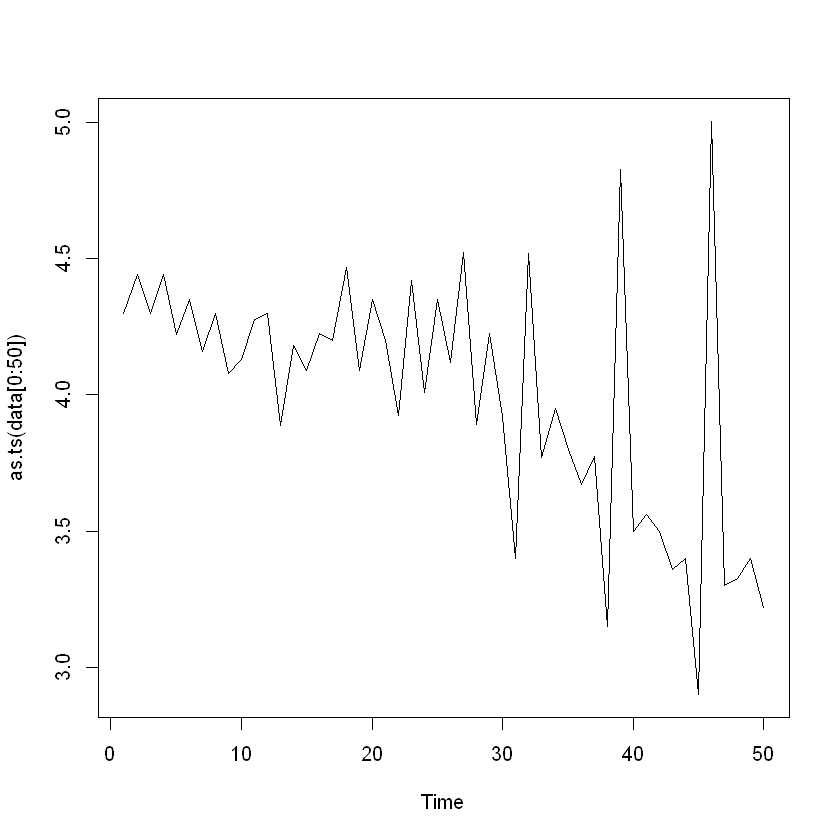

In [23]:
set.seed(4)
data <- read.csv("fact_price_weekly_butter.csv",stringsAsFactors=FALSE)
data <-as.numeric(data$curr_value)
print(data[0:10])
plot(as.ts(data[0:50]))

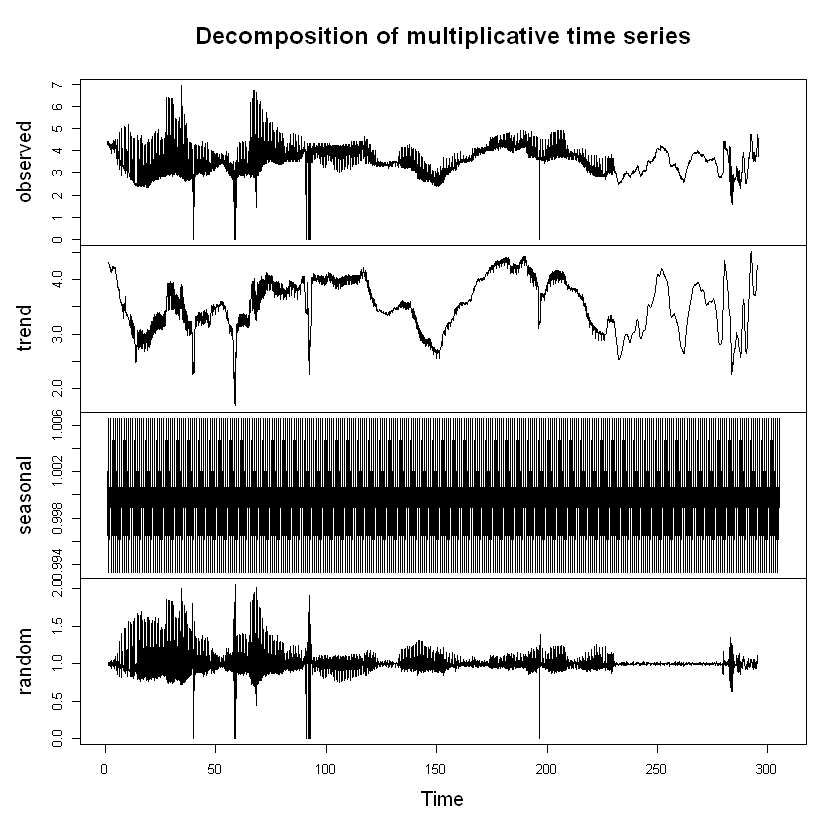

In [25]:
library(FBN)
decomposed_days = decompose(ts(data, frequency = 7), "multiplicative")
plot(decomposed_days)

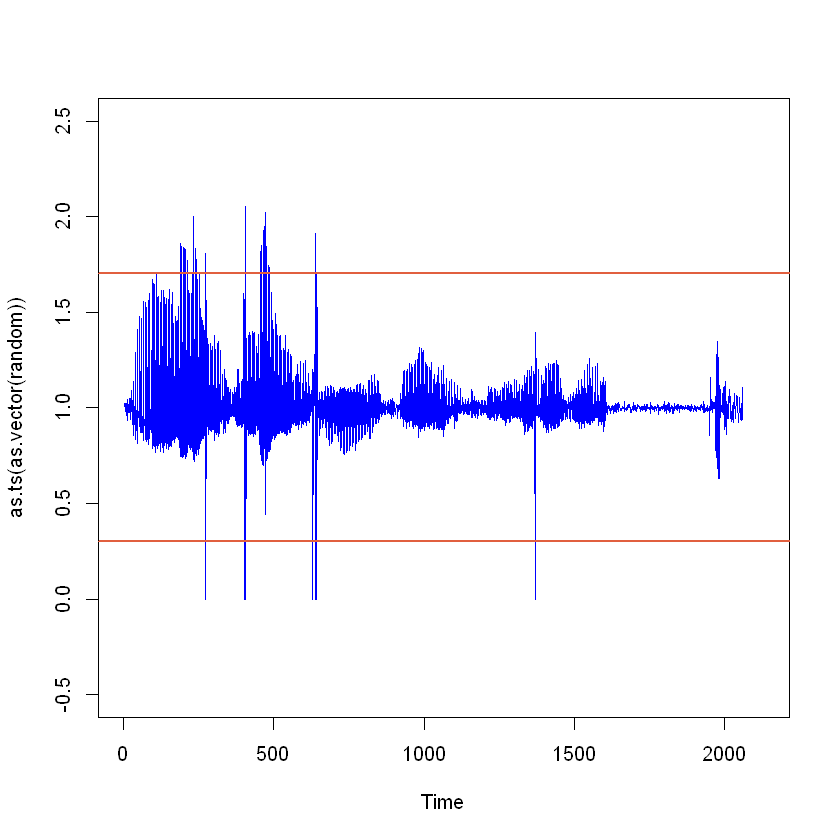

In [31]:
random = decomposed_days$random
min = mean(random, na.rm = T) - 4*sd(random, na.rm = T)
max = mean(random, na.rm = T) + 4*sd(random, na.rm = T)
 
plot(as.ts(as.vector(random)), ylim = c(-0.5,2.5),col="blue")
abline(h=max, col="#e15f3f", lwd=2)
abline(h=min, col="#e15f3f", lwd=2)

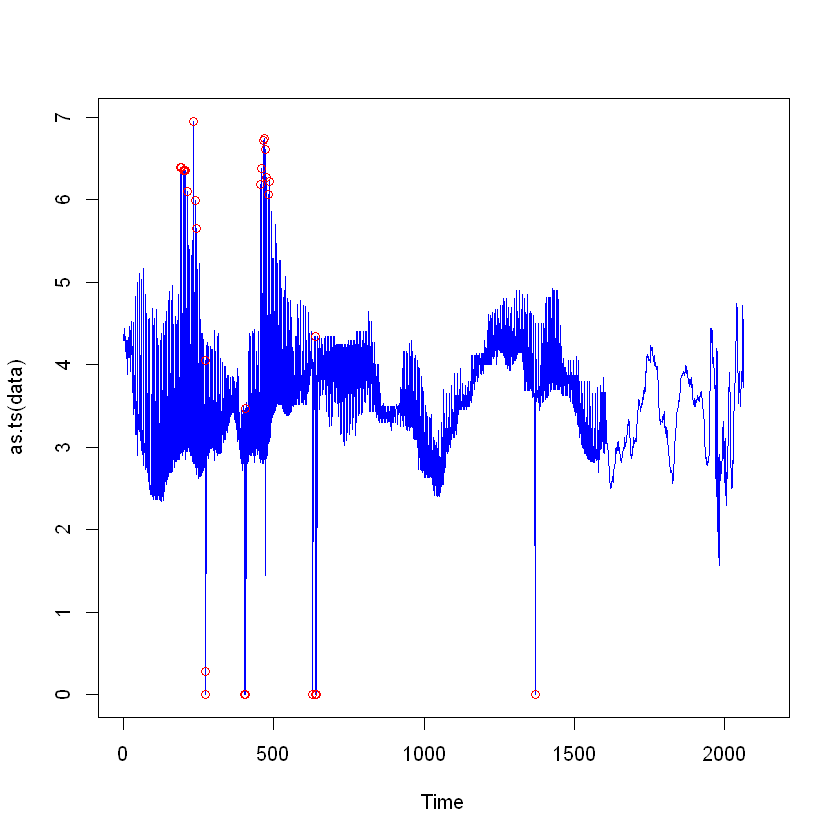

In [40]:
#find anomaly
position = data.frame(id=seq(1, length(random)), value=random)
anomalyH = position[position$value > max, ]
anomalyH = anomalyH[!is.na(anomalyH$value), ]
anomalyL = position[position$value < min, ]
anomalyL = anomalyL[!is.na(anomalyL$value), ]
anomaly = data.frame(id=c(anomalyH$id, anomalyL$id),
 value=c(anomalyH$value, anomalyL$value))
anomaly = anomaly[!is.na(anomaly$value), ]
 
plot(as.ts(data),col="blue")
real = data.frame(id=seq(1, length(data)), value=data)
realAnomaly = real[anomaly$id, ]
points(x = realAnomaly$id, y =realAnomaly$value, col="red")

# Approach 2